In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
dc_taxi = pd.read_csv('Taxicab_Trips_Sampling_in_July_2017.csv')

In [3]:
dc_taxi.head()

,OBJECTID_1,OBJECTID,TRIPTYPE,PROVIDER,METERFARE,TIP,SURCHARGE,EXTRAS,TOLLS,TOTALAMOUNT,...,TRIPTIME,PICKUP_BLOCK_LATITUDE,PICKUP_BLOCK_LONGITUDE,PICKUP_BLOCKNAME,DROPOFF_BLOCK_LATITUDE,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCKNAME,AIRPORT,PICKUPDATETIME_TR,DROPOFFDATETIME_TR
0,1001,27214366,PSP,"Transco, Inc.",3.52,0.00,0.25,21.75,0.0,25.52,...,1.0,38.896656,-76.947648,4000 - 4121 BLOCK OF MINNESOTA AVENUE NE,38.896656,-76.947648,4000 - 4121 BLOCK OF MINNESOTA AVENUE NE,N,2017-07-28T18:00:00.000Z,2017-07-28T18:00:00.000Z
1,1002,27214367,PSP,"Transco, Inc.",5.14,0.00,0.25,0.00,0.0,5.39,...,4.0,38.899976,-76.982460,1500 - 1599 BLOCK OF BENNING ROAD NE,38.900202,-76.994359,800 - 899 BLOCK OF H STREET NE,N,2017-07-28T18:00:00.000Z,2017-07-28T18:00:00.000Z
2,1003,27214368,PSP,"Transco, Inc.",14.32,4.67,0.25,1.00,0.0,20.24,...,23.0,38.886039,-77.018731,400 - 599 BLOCK OF C STREET SW,38.911497,-77.038485,1600 - 1618 BLOCK OF 17TH STREET NW,N,2017-07-28T19:00:00.000Z,2017-07-28T19:00:00.000Z
3,1004,27214369,PSP,"Transco, Inc.",4.33,1.12,0.25,1.00,0.0,6.70,...,2.0,38.905654,-77.042568,1800 - 1899 BLOCK OF M STREET NW,38.901930,-77.043459,900 - 999 BLOCK OF 19TH STREET NW,N,2017-07-28T19:00:00.000Z,2017-07-28T19:00:00.000Z
4,1005,27214370,PSP,"Transco, Inc.",11.89,0.00,0.25,1.00,0.0,13.14,...,18.0,38.890500,-77.025048,700 - 1199 BLOCK OF MADISON DRIVE NW,38.916384,-77.046519,1900 - 1999 BLOCK OF CONNECTICUT AVENUE NW,N,2017-07-29T14:00:00.000Z,2017-07-29T15:00:00.000Z


In [4]:
dc_taxi.shape

(228611, 29)

In [5]:
dc_taxi.dtypes

OBJECTID_1                   int64
OBJECTID                     int64
TRIPTYPE                    object
PROVIDER                    object
METERFARE                  float64
TIP                        float64
SURCHARGE                  float64
EXTRAS                     float64
TOLLS                      float64
TOTALAMOUNT                float64
PAYMENTTYPE                 object
PAYMENTCARDPROVIDER         object
PICKUPCITY                  object
PICKUPSTATE                 object
PICKUPZIP                   object
DROPOFFCITY                 object
DROPOFFSTATE                object
DROPOFFZIP                  object
TRIPMILEAGE                float64
TRIPTIME                   float64
PICKUP_BLOCK_LATITUDE      float64
PICKUP_BLOCK_LONGITUDE     float64
PICKUP_BLOCKNAME            object
DROPOFF_BLOCK_LATITUDE     float64
DROPOFF_BLOCK_LONGITUDE    float64
DROPOFF_BLOCKNAME           object
AIRPORT                     object
PICKUPDATETIME_TR           object
DROPOFFDATETIME_TR  

In [6]:
dc_taxi.describe()

,OBJECTID_1,OBJECTID,METERFARE,TIP,SURCHARGE,EXTRAS,TOLLS,TOTALAMOUNT,TRIPMILEAGE,TRIPTIME,PICKUP_BLOCK_LATITUDE,PICKUP_BLOCK_LONGITUDE,DROPOFF_BLOCK_LATITUDE,DROPOFF_BLOCK_LONGITUDE
count,228611.000000,2.286110e+05,228611.000000,227266.000000,227266.000000,227266.000000,227266.000000,228611.000000,227053.000000,2.142480e+05,196581.000000,196581.000000,180638.000000,180638.000000
mean,114306.000000,2.947953e+07,12.428953,1.250630,0.249517,0.606794,0.001193,14.536324,4.470613,8.315156e+02,38.902876,-77.029668,38.904968,-77.029751
std,65994.455532,1.326066e+06,9.921780,5.336271,0.082423,1.014569,0.124076,11.932572,95.165003,1.430010e+05,0.014940,0.018711,0.016867,0.021313
min,1.000000,2.719664e+07,-82.750000,-3.000000,-37.810000,-3.750000,-1.500000,-83.000000,-32.100000,0.000000e+00,38.814661,-77.112057,38.812061,-77.113633
25%,57153.500000,2.831322e+07,7.300000,0.000000,0.250000,0.000000,0.000000,8.820000,1.000000,7.000000e+00,38.895463,-77.041686,38.896039,-77.042574
50%,114306.000000,2.949036e+07,10.000000,0.000000,0.250000,0.000000,0.000000,11.820000,1.900000,1.100000e+01,38.900339,-77.031140,38.901935,-77.030801
75%,171458.500000,3.064171e+07,14.590000,2.000000,0.250000,1.000000,0.000000,17.030000,3.310000,1.700000e+01,38.906836,-77.018731,38.910634,-77.017554
max,228611.000000,3.174758e+07,788.100000,2322.000000,8.720000,65.000000,39.010000,2333.600000,5723.260000,2.502095e+07,38.991763,-76.911744,38.991518,-76.910927


In [7]:
dc_taxi.isna().sum()

OBJECTID_1                     0
OBJECTID                       0
TRIPTYPE                       0
PROVIDER                       0
METERFARE                      0
TIP                         1345
SURCHARGE                   1345
EXTRAS                      1345
TOLLS                       1345
TOTALAMOUNT                    0
PAYMENTTYPE                    0
PAYMENTCARDPROVIDER            0
PICKUPCITY                 59176
PICKUPSTATE                53343
PICKUPZIP                  46379
DROPOFFCITY                70215
DROPOFFSTATE               54288
DROPOFFZIP                 46609
TRIPMILEAGE                 1558
TRIPTIME                   14363
PICKUP_BLOCK_LATITUDE      32030
PICKUP_BLOCK_LONGITUDE     32030
PICKUP_BLOCKNAME           32030
DROPOFF_BLOCK_LATITUDE     47973
DROPOFF_BLOCK_LONGITUDE    47973
DROPOFF_BLOCKNAME          47973
AIRPORT                        0
PICKUPDATETIME_TR              0
DROPOFFDATETIME_TR             0
dtype: int64

In [8]:
dc_taxi = dc_taxi.loc[dc_taxi.TOTALAMOUNT>0]
dc_taxi = dc_taxi.loc[dc_taxi.TOTALAMOUNT<1000]
dc_taxi = dc_taxi.loc[dc_taxi.METERFARE>0]
dc_taxi = dc_taxi.loc[dc_taxi.TRIPMILEAGE>0]
dc_taxi = dc_taxi.loc[dc_taxi.TRIPMILEAGE<200]
dc_taxi = dc_taxi.loc[dc_taxi.TRIPTIME>0]
dc_taxi = dc_taxi.loc[dc_taxi.TRIPTIME<120]
dc_taxi.AIRPORT = dc_taxi.AIRPORT == "Y"
dc_taxi["pickup_quadrant"] = dc_taxi.PICKUP_BLOCKNAME.str.extract(r"\s([NS][EW])\b")
dc_taxi["dropoff_quadrant"] = dc_taxi.DROPOFF_BLOCKNAME.str.extract(r"\s([NS][EW])\b")
dc_taxi["tipping"] = (dc_taxi.TIP>0) * 1 

dc_taxi['pickup_datetime'] = pd.to_datetime(dc_taxi.PICKUPDATETIME_TR)
dc_taxi['dropoff_datetime'] = pd.to_datetime(dc_taxi.DROPOFFDATETIME_TR)
dc_taxi['pickup_date'] = dc_taxi.pickup_datetime.dt.date
dc_taxi['pickup_hour'] = dc_taxi.pickup_datetime.dt.hour
dc_taxi['dropoff_date'] = dc_taxi.dropoff_datetime.dt.date
dc_taxi['dropoff_hour'] = dc_taxi.dropoff_datetime.dt.hour

dc_taxi = dc_taxi.drop(["OBJECTID_1", "OBJECTID"], axis=1)

In [9]:
dc_taxi.loc[dc_taxi.DROPOFFSTATE=="Virgin Islands", "DROPOFFSTATE"] = "Virginia"
dc_taxi.loc[dc_taxi.PICKUPSTATE=="Virgin Islands", "PICKUPSTATE"] = "Virginia"
dc_taxi.loc[dc_taxi.DROPOFFSTATE=="Washington", "DROPOFFSTATE"] = "District of Columbia"
dc_taxi.loc[dc_taxi.PICKUPSTATE=="Washington", "PICKUPSTATE"] = "District of Columbia"
dc_taxi.loc[dc_taxi.PAYMENTCARDPROVIDER=="Unknown = 0", "PAYMENTCARDPROVIDER"] = np.nan

In [10]:
dc_taxi.head()

,TRIPTYPE,PROVIDER,METERFARE,TIP,SURCHARGE,EXTRAS,TOLLS,TOTALAMOUNT,PAYMENTTYPE,PAYMENTCARDPROVIDER,...,DROPOFFDATETIME_TR,pickup_quadrant,dropoff_quadrant,tipping,pickup_datetime,dropoff_datetime,pickup_date,pickup_hour,dropoff_date,dropoff_hour
0,PSP,"Transco, Inc.",3.52,0.00,0.25,21.75,0.0,25.52,CreditCard,VisaCredit,...,2017-07-28T18:00:00.000Z,NE,NE,0,2017-07-28 18:00:00+00:00,2017-07-28 18:00:00+00:00,2017-07-28,18,2017-07-28,18
1,PSP,"Transco, Inc.",5.14,0.00,0.25,0.00,0.0,5.39,Cash,Cash,...,2017-07-28T18:00:00.000Z,NE,NE,0,2017-07-28 18:00:00+00:00,2017-07-28 18:00:00+00:00,2017-07-28,18,2017-07-28,18
2,PSP,"Transco, Inc.",14.32,4.67,0.25,1.00,0.0,20.24,CreditCard,MasterCardCredit,...,2017-07-28T19:00:00.000Z,SW,NW,1,2017-07-28 19:00:00+00:00,2017-07-28 19:00:00+00:00,2017-07-28,19,2017-07-28,19
3,PSP,"Transco, Inc.",4.33,1.12,0.25,1.00,0.0,6.70,CreditCard,MasterCardCredit,...,2017-07-28T19:00:00.000Z,NW,NW,1,2017-07-28 19:00:00+00:00,2017-07-28 19:00:00+00:00,2017-07-28,19,2017-07-28,19
4,PSP,"Transco, Inc.",11.89,0.00,0.25,1.00,0.0,13.14,Cash,Cash,...,2017-07-29T15:00:00.000Z,NW,NW,0,2017-07-29 14:00:00+00:00,2017-07-29 15:00:00+00:00,2017-07-29,14,2017-07-29,15


In [11]:
#does drop off location influence tips?
dc_taxi.groupby(['dropoff_quadrant'])['TIP'].sum()

dropoff_quadrant
NE     20448.91
NW    143165.76
SE     11829.27
SW     11475.14
Name: TIP, dtype: float64

In [ ]:
# dc_quadrants = pd.get_dummies(dc_taxi['dropoff_quadrant'])
# dc_quadrants.head()

In [ ]:
# dc_taxi = pd.concat([dc_taxi,dc_quadrants], axis = 1)
# dc_taxi.head()

In [12]:
formula = "TIP ~ C(dropoff_quadrant)"
model = smf.ols(formula, dc_taxi).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TIP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     11.86
Date:                Mon, 29 Jul 2019   Prob (F-statistic):           9.25e-08
Time:                        10:46:44   Log-Likelihood:            -3.2829e+05
No. Observations:              159145   AIC:                         6.566e+05
Df Residuals:                  159141   BIC:                         6.566e+05
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.1545      0.013     90.112      0.000       1.129       1.180
C(dropoff_quadrant)[T.NW]     0.0251      0.014      1.823      0.068      -0.002       0.052
C(dropoff_quadrant)[T.SE]     0.1143      0.024      4.726      0.000       0.067       0.162
C(dropoff_quadrant)[T.SW]    -0.0867      0.034     -2.574      0.010      -0.153      -0.021
==============================================================================
Omnibus:                   449753.919   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     144195102653.517
Skew:                          36.510   Prob(JB):                         0.00
Kurtosis:                    4665.632   Cond. No.                         8.71
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [53]:
formula = "TOTALAMOUNT ~ C(PROVIDER) + TRIPMILEAGE"
model = smf.ols(formula, dc_taxi).fit(cov_type="HC1")
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TOTALAMOUNT   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     4778.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        11:49:46   Log-Likelihood:            -5.7946e+05
No. Observations:              202092   AIC:                         1.159e+06
Df Residuals:                  202083   BIC:                         1.159e+06
Df Model:                           8                                         
Covariance Type:                  HC1                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.6795      0.037    206.190      0.000       7.606       7.752
C(PROVIDER)[T.DCVIP Cab]            0.1283      0.037      3.464      0.001       0.056       0.201
C(PROVIDER)[T.Hitch]               -0.4647      0.024    -19.304      0.000      -0.512      -0.418
C(PROVIDER)[T.My Taxi Control]      0.2023      0.089      2.278      0.023       0.028       0.376
C(PROVIDER)[T.Transco, Inc.]       -0.1554      0.027     -5.796      0.000      -0.208      -0.103
C(PROVIDER)[T.United Ventures]      0.1721      0.031      5.575      0.000       0.112       0.233
C(PROVIDER)[T.Verifone]            -0.0583      0.026     -2.212      0.027      -0.110      -0.007
C(PROVIDER)[T.Yellow Cab of DC]    -3.3643      0.052    -65.127      0.000      -3.466      -3.263
TRIPMILEAGE                         2.2363      0.012    191.222      0.000       2.213       2.259
==============================================================================
Omnibus:                   379250.582   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      22764469138.527
Skew:                          12.940   Prob(JB):                         0.00
Kurtosis:                    1647.016   Cond. No.                         54.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [25]:
dc_taxi.groupby(['PROVIDER', 'AIRPORT'])['TOTALAMOUNT'].sum()

PROVIDER          AIRPORT
CMT               False      526254.29
                  True       119816.85
DCVIP Cab         False      285752.47
                  True        87787.45
Hitch             False      313646.84
                  True        85614.20
My Taxi Control   False       22620.13
                  True         8953.02
Transco, Inc.     False      304172.11
                  True        59710.80
United Ventures   False      312926.36
                  True       135010.45
Verifone          False      307016.28
                  True        70246.34
Yellow Cab of DC  False      251743.97
                  True        49096.80
Name: TOTALAMOUNT, dtype: float64

In [28]:
dc_taxi.columns

Index(['TRIPTYPE', 'PROVIDER', 'METERFARE', 'TIP', 'SURCHARGE', 'EXTRAS',
       'TOLLS', 'TOTALAMOUNT', 'PAYMENTTYPE', 'PAYMENTCARDPROVIDER',
       'PICKUPCITY', 'PICKUPSTATE', 'PICKUPZIP', 'DROPOFFCITY', 'DROPOFFSTATE',
       'DROPOFFZIP', 'TRIPMILEAGE', 'TRIPTIME', 'PICKUP_BLOCK_LATITUDE',
       'PICKUP_BLOCK_LONGITUDE', 'PICKUP_BLOCKNAME', 'DROPOFF_BLOCK_LATITUDE',
       'DROPOFF_BLOCK_LONGITUDE', 'DROPOFF_BLOCKNAME', 'AIRPORT',
       'PICKUPDATETIME_TR', 'DROPOFFDATETIME_TR', 'pickup_quadrant',
       'dropoff_quadrant', 'tipping', 'pickup_datetime', 'dropoff_datetime',
       'pickup_date', 'pickup_hour', 'dropoff_date', 'dropoff_hour'],
      dtype='object')

In [29]:
dc_taxi_airport = dc_taxi[dc_taxi['AIRPORT'] == True]

In [35]:
dc_taxi_airport = dc_taxi_airport[['DROPOFF_BLOCK_LONGITUDE','DROPOFF_BLOCK_LATITUDE']]
dc_taxi_airport

,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCK_LATITUDE
75,NaN,NaN
81,-77.031962,38.900771
82,-77.054005,38.925704
83,NaN,NaN
84,NaN,NaN
85,NaN,NaN
86,NaN,NaN
87,NaN,NaN
88,-77.011832,38.951580
98,NaN,NaN


In [36]:
dc_taxi_airport.isna().sum()

DROPOFF_BLOCK_LONGITUDE    13181
DROPOFF_BLOCK_LATITUDE     13181
dtype: int64

In [37]:
dc_taxi_airport.dropna()

,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCK_LATITUDE
81,-77.031962,38.900771
82,-77.054005,38.925704
88,-77.011832,38.951580
151,-77.070013,38.918461
152,-77.032804,38.897347
153,-77.031950,38.908039
259,-77.034559,38.909175
261,-76.987603,38.933702
262,-77.028084,38.897829
320,-77.033644,38.900769


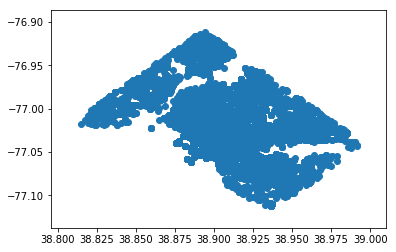

In [50]:
plt.scatter(dc_taxi.PICKUP_BLOCK_LATITUDE, dc_taxi.PICKUP_BLOCK_LONGITUDE)

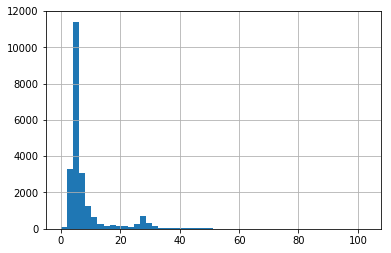

In [52]:
dc_taxi.loc[dc_taxi.AIRPORT].TRIPMILEAGE.hist(bins=50)

In [48]:
dc_taxi.groupby(['DROPOFF_BLOCK_LONGITUDE', 'DROP'])['TOTALAMOUNT'].sum()

,DROPOFF_BLOCK_LONGITUDE,DROPOFF_BLOCK_LATITUDE


In [ ]:
for index, row in dc_taxi_airport.iterrows():
    if ()